a data engineer was asked to group the customer based on the given details Customer ID, Gender, Age , Annual Income in $ and Spending Score (1-100) Preform the following operations:
a) open the dataset and display the top 5 rows
b) preform a exploratory Data analysis (eda) on the provided datsset
c) preform scaling and apply fuzzy c means clustering
d) try to plot a scattor plot with labels after clustering
e) visualize the inner cluster distance and silhouette score
dataset: Mall_customers.csv

In [58]:
mall_dataset = pd.read_csv('Mall_Customers.csv')


In [59]:
mall_dataset.head().columns


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [60]:
mall_dataset.drop(['CustomerID'], axis=1, inplace=True)
mall_dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [61]:
gender_mapping = {"Female": 0, "Male": 1}
mall_dataset['Genre'] = mall_dataset['Genre'].map(gender_mapping)
mall_dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [62]:
! pip install fuzzy-c-means


In [63]:
number_clusters = 6


In [64]:
from fcmeans import FCM

fcm = FCM(n_clusters=number_clusters)
fcm.fit(mall_dataset.values)

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(mall_dataset.values)

In [65]:
fcm.centers


array([[ 0.46128576, 54.66703718, 54.82137958, 48.86229814],
       [ 0.41149889, 32.6063882 , 84.07865502, 83.12156202],
       [ 0.56078606, 42.22303397, 87.09875621, 17.45936232],
       [ 0.4194334 , 25.24361497, 26.0828902 , 77.62679712],
       [ 0.4015522 , 26.40824357, 58.74778765, 49.91549458],
       [ 0.35424081, 46.9818867 , 28.80205478, 18.3223765 ]])

In [66]:
fcm_labels = fcm.predict(mall_dataset.values)


In [67]:
fcm_labels


array([5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 0, 3, 5, 3,
       5, 3, 0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4,
       4, 0, 0, 4, 0, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 1, 4, 1, 2, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [68]:
mall_dataset['Fuzzy_cluster'] = fcm_labels
mall_dataset


,Genre,Age,Annual Income (k$),Spending Score (1-100),Fuzzy_cluster
0,1,19,15,39,5
1,1,21,15,81,3
2,0,20,16,6,5
3,0,23,16,77,3
4,0,31,17,40,5
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,2
197,1,32,126,74,1
198,1,32,137,18,2


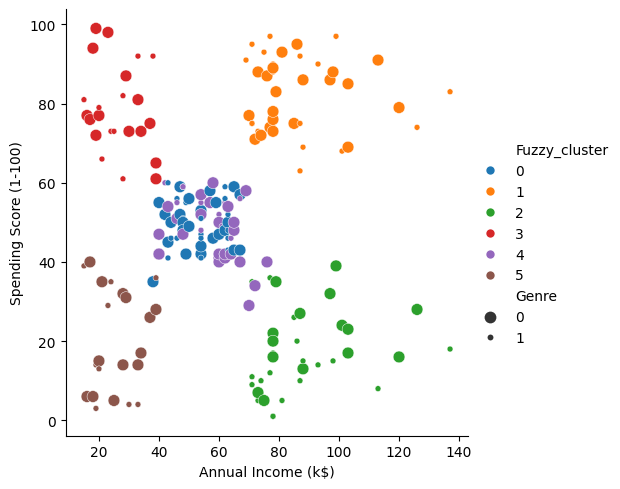

In [69]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Fuzzy_cluster',
            size='Genre', data=mall_dataset,palette='tab10')


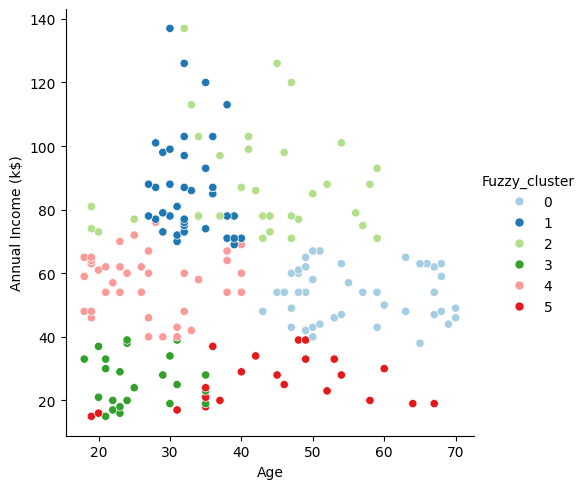

In [70]:
sns.relplot(x='Age', y='Annual Income (k$)', hue='Fuzzy_cluster', data=mall_dataset, palette = "Paired")


In [71]:
print("Silhouette score: {}".format(silhouette_score(mall_dataset.drop(['Fuzzy_cluster'], axis=1), fcm_labels)))


Silhouette score: 0.45115060735645857


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


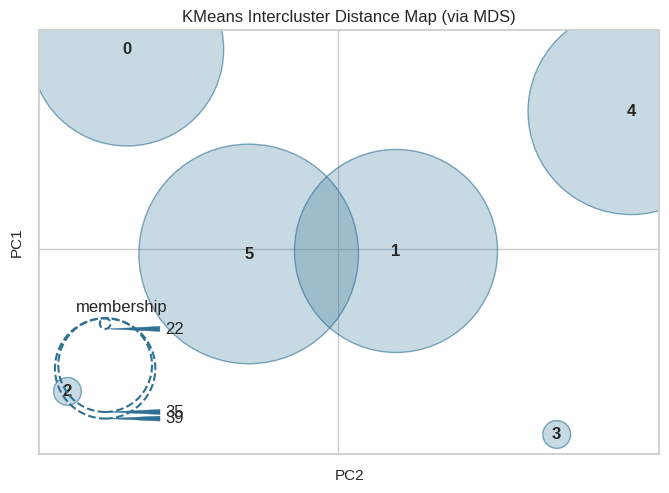

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [72]:
# InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance


model = KMeans(number_clusters)
visualizer = InterclusterDistance(model)

visualizer.fit(mall_dataset)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


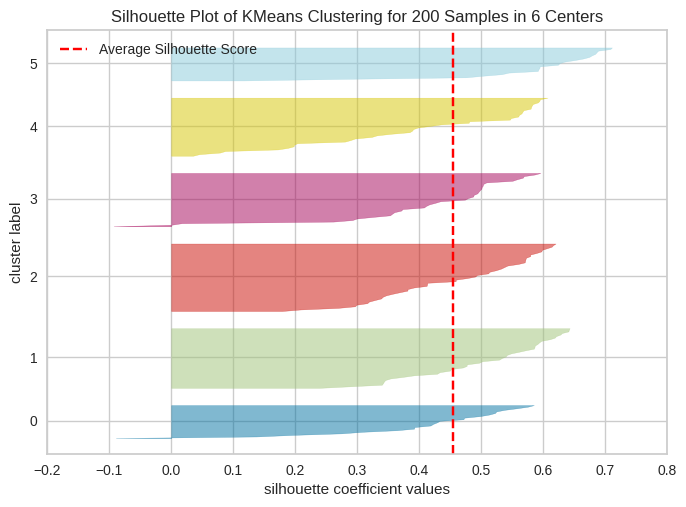

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [73]:
model = KMeans(number_clusters, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(mall_dataset)
visualizer.show()